In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import powerlaw as pl
import networkx as nx
import seaborn as sns
import pandas as pd
import numpy as np
import os, sys

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)


from Utils import evaluation_measures as ev
from scipy.stats import ks_2samp


# Load Data using Pickle

In [2]:
network = 'airports'
results = pd.read_csv('../Results/All Backbones/' + network + '.csv')

# Fractions of edges to Assess

In [3]:
#fractions = [0.5 , 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
fractions = [0.1, 0.25, 0.5, 0.75, 1]
fractions.sort(reverse=True)

In [4]:
backbone_names = list(results.columns.values)
backbone_names.remove('source')
backbone_names.remove('target')
backbone_names.remove('weight')

In [18]:

backbones = ['global_score', 'gloss_alpha', 'nc_alpha', 'mlf_score', 'pf_alpha', 'df_alpha', 'lans_alpha', 'ecm_alpha']
labels={'original':'Original Network', 'gloss_alpha':'GLOSS Filter', 'nc_alpha':'Noise Corrected Filter', 'mlf_score':'Marginal Likelihood Filter', 'pf_alpha':'Polya Urn Filter', 'df_alpha':'Disparity Filter', 'hss_score':'High Salience Skeleton', 'global_score':'Global Threshold', 'lans_alpha':'LANS Filter', 'ecm_alpha':'ECM Filter'}
colors = {'original':'black', 'gloss_alpha':'royalblue', 'nc_alpha':'purple', 'mlf_score':'crimson', 'pf_alpha':'#8C564b', 'df_alpha':'orange', 'ecm_alpha':'olive', 'global_score':'grey', 'lans_alpha':'green'}

m= ['o','*','X','v', '^', 'P', '>', '<']
G = nx.from_pandas_edgelist(results[['source', 'target', 'weight']], edge_attr='weight')

# Plot Distributions Comparing Different Backbones

In [16]:
figures_path = '../Results/Figures/Null Models/Distributions/Wrt Backbones/'

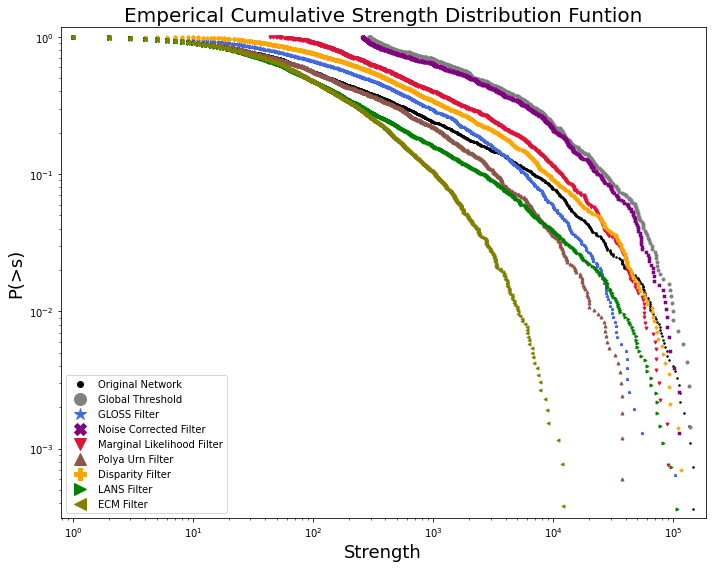

In [27]:
fraction = 0.25

values = ev.get_weighted_degree_distribution(G)[1]
x = np.sort(values)
x = -np.sort(-np.array(values))
y = np.arange(1, len(x) + 1)/len(x)

plt.figure(figsize=(10,8))
plt.loglog(x, y, marker='.', markersize=3, linestyle='none', label=labels['original'], color=colors['original'])

for i, name in enumerate(backbones):
    f = int(fraction * results.shape[0])
    if 'alpha' in name:
        backbone_res = results[['source', 'target', 'weight', name]].sort_values(by=[name, 'weight'], ascending=[True, False])[:f]

    else:
        backbone_res = results[['source', 'target', 'weight', name]].sort_values(by=[name, 'weight'], ascending=[False, False])[:f]
    
    backbone = nx.from_pandas_edgelist(backbone_res[['source', 'target', 'weight']], edge_attr='weight')
    values = ev.get_weighted_degree_distribution(backbone)[1]
    x = np.sort(values)
    x = -np.sort(-np.array(values))
    y = np.arange(1, len(x) + 1)/len(x)
    plt.loglog(x, y, marker=m[i], markersize=3, linestyle='none', label=labels[name], color=colors[name])



plt.xlabel('Strength', fontsize=18)
plt.ylabel('P(>s)', fontsize=18)
plt.title('Emperical Cumulative Strength Distribution Funtion', fontsize=20)
plt.legend(markerscale=4)
plt.margins(0.02)
plt.tight_layout()

plt.savefig('weights_dist.png', bbox_inches='tight', dpi=300)

#### Comparing Weight Distribution

In [ ]:
for fraction in fractions:
    col=1
    row=7
    fig, axs = plt.subplots(col, row, figsize=(30,5))

    for i, name in enumerate(backbones):
        ax=axs[i%row]
        values = ev.get_weight_distribution(G)[1]
        x = np.sort(values)
        y = np.arange(1, len(x) + 1)/len(x)

        ax.loglog(x, y, marker='.', markersize=1, linestyle='none', label=labels['original'], color=colors['original'])
        
        f = int(fraction * results.shape[0])
        if 'alpha' in name:
            backbone_res = results[['source', 'target', 'weight', name]].sort_values(by=[name, 'weight'], ascending=[True, False])[:f]

        else:
            backbone_res = results[['source', 'target', 'weight', name]].sort_values(by=[name, 'weight'], ascending=[False, False])[:f]
        
        backbone = nx.from_pandas_edgelist(backbone_res[['source', 'target', 'weight']], edge_attr='weight')
        values = ev.get_weight_distribution(backbone)[1]
        x = np.sort(values)
        y = np.arange(1, len(x) + 1)/len(x)
        ax.loglog(x, y, marker=m[i], markersize=1, linestyle='none', label=labels[name] , color=colors[name])

        plt.setp(axs[:], xlabel='Weight')
        ax.tick_params(axis='x', labelsize=15)
        ax.tick_params(axis='y', labelsize=15)
        ax.xaxis.label.set_size(20)
            
        #ax.legend(markerscale=5, loc='lower right', fontsize=15)
        ax.grid(True)
        ax.margins(0.02)

    fig.suptitle('Emperical Cumulative Weight Distribution Funtion for a ' + str(int(fraction*100)) + '% of Edges ', fontsize=20)

    labels_handles = {
    label: handle for ax in fig.axes for handle, label in zip(*ax.get_legend_handles_labels())
    }

    lg = fig.legend(labels_handles.values(), labels_handles.keys(), bbox_to_anchor=(0.5, -0.05), loc='center', ncol=8, markerscale=10, fontsize=15)

    plt.tight_layout()

    fig.savefig(figures_path + 'weight-dist-' + str(fraction) + '.png', bbox_inches='tight', dpi=300)
    plt.close(fig)




#### Comparing Degree Distribution

In [ ]:
for fraction in fractions:
    col=1
    row=7
    fig, axs = plt.subplots(col, row, figsize=(30,5))

    for i, name in enumerate(backbones):
        ax=axs[i%row]
        values = ev.get_degree_distribution(G)[1]
        x = np.sort(values)
        y = np.arange(1, len(x) + 1)/len(x)

        ax.loglog(x, y, marker='.', markersize=1, linestyle='none', label=labels['original'], color=colors['original'])
        
        f = int(fraction * results.shape[0])
        if 'alpha' in name:
            backbone_res = results[['source', 'target', 'weight', name]].sort_values(by=[name, 'weight'], ascending=[True, False])[:f]

        else:
            backbone_res = results[['source', 'target', 'weight', name]].sort_values(by=[name, 'weight'], ascending=[False, False])[:f]
        
        backbone = nx.from_pandas_edgelist(backbone_res[['source', 'target', 'weight']], edge_attr='weight')
        values = ev.get_degree_distribution(backbone)[1]
        x = np.sort(values)
        y = np.arange(1, len(x) + 1)/len(x)
        ax.loglog(x, y, marker=m[i], markersize=1, linestyle='none', label=labels[name] , color=colors[name])

        plt.setp(axs[:], xlabel='Degree')
        ax.tick_params(axis='x', labelsize=15)
        ax.tick_params(axis='y', labelsize=15)
        ax.xaxis.label.set_size(20)
            
        #ax.legend(markerscale=5, loc='lower right', fontsize=15)
        ax.grid(True)
        ax.margins(0.02)

    fig.suptitle('Emperical Cumulative Degree Distribution Funtion for a ' + str(int(fraction*100)) + '% of Edges ', fontsize=20)

    labels_handles = {
    label: handle for ax in fig.axes for handle, label in zip(*ax.get_legend_handles_labels())
    }

    lg = fig.legend(labels_handles.values(), labels_handles.keys(), bbox_to_anchor=(0.5, -0.05), loc='center', ncol=8, markerscale=10, fontsize=15)

    plt.tight_layout()

    fig.savefig(figures_path + 'degree-dist-' + str(fraction) + '.png', bbox_inches='tight', dpi=300)
    plt.close(fig)




# Plot Distributions Comparing in Each Backbone

In [ ]:
figures_path = '../Results/Figures/Null Models/Distributions/Wrt Fractions/'

In [19]:
# for i, name in enumerate(backbones):
#     plt.figure(figsize=(7,5))
#     for fr in fractions:
#         f = int(fr * results.shape[0])
#         if 'alpha' in name:
#             backbone_res = results[['source', 'target', 'weight', name]].sort_values(by=[name, 'weight'], ascending=[True, False])[:f]

#         else:
#             backbone_res = results[['source', 'target', 'weight', name]].sort_values(by=[name, 'weight'], ascending=[False, False])[:f]
    
#         backbone = nx.from_pandas_edgelist(backbone_res[['source', 'target', 'weight']], edge_attr='weight')
#         values = ev.get_weight_distribution(backbone)[1]
#         x = np.sort(values)
#         y = np.arange(1, len(x) + 1)/len(x)
#         plt.loglog(x, y, marker=m[i], markersize=0.5, linestyle='none', label='fraction='+str(fr))
#     break



# plt.xlabel('Weight')
# plt.title('Emperical cumulative Weight Distribution funtion\n for the ' + labels[name])
# plt.legend(markerscale=7, loc='lower right')
# plt.margins(0.02)
# plt.tight_layout()

#### Comparing Weight Distribution

In [ ]:
col=1
row=5
for i, name in enumerate(backbones):
    fig, axs = plt.subplots(col, row, figsize=(22,5))
    for j, fr in enumerate(fractions):
        f = int(fr * results.shape[0])
        if 'alpha' in name:
            backbone_res = results[['source', 'target', 'weight', name]].sort_values(by=[name, 'weight'], ascending=[True, False])[:f]

        else:
            backbone_res = results[['source', 'target', 'weight', name]].sort_values(by=[name, 'weight'], ascending=[False, False])[:f]
    
        backbone = nx.from_pandas_edgelist(backbone_res[['source', 'target', 'weight']], edge_attr='weight')
        values = ev.get_weight_distribution(backbone)[1]
        x = np.sort(values)
        y = np.arange(1, len(x) + 1)/len(x)
        ax=axs[j%row]
        ax.loglog(x, y, marker=m[i], markersize=1, linestyle='none', label='fraction='+str(fr), color=colors[name])
        plt.setp(axs[:], xlabel='Weight')
        ax.tick_params(axis='x', labelsize=15)
        ax.tick_params(axis='y', labelsize=15)
        ax.xaxis.label.set_size(20)
        
        fig.suptitle('Emperical Cumulative Weight Distribution Funtion for the ' + labels[name], fontsize=20)
        ax.legend(markerscale=5, loc='lower right', fontsize=15)
        ax.grid(True)
        ax.margins(0.02)
        plt.tight_layout()
        fig.savefig(figures_path + 'weight-dist-' + name + '.png', bbox_inches='tight', dpi=300)
        plt.close(fig)




#### Comparing Degree Distribution

In [ ]:
col=1
row=5
for i, name in enumerate(backbones):
    fig, axs = plt.subplots(col, row, figsize=(22,5))
    for j, fr in enumerate(fractions):
        f = int(fr * results.shape[0])
        if 'alpha' in name:
            backbone_res = results[['source', 'target', 'weight', name]].sort_values(by=[name, 'weight'], ascending=[True, False])[:f]

        else:
            backbone_res = results[['source', 'target', 'weight', name]].sort_values(by=[name, 'weight'], ascending=[False, False])[:f]
    
        backbone = nx.from_pandas_edgelist(backbone_res[['source', 'target', 'weight']], edge_attr='weight')
        values = ev.get_degree_distribution(backbone)[1]
        x = np.sort(values)
        y = np.arange(1, len(x) + 1)/len(x)
        ax=axs[j%row]
        ax.loglog(x, y, marker=m[i], markersize=1, linestyle='none', label='fraction='+str(fr), color=colors[name])
        plt.setp(axs[:], xlabel='Weight')
        ax.tick_params(axis='x', labelsize=15)
        ax.tick_params(axis='y', labelsize=15)
        ax.xaxis.label.set_size(20)
        
        fig.suptitle('Emperical Cumulative Degree Distribution Funtion for the ' + labels[name], fontsize=20)
        ax.legend(markerscale=5, loc='lower right', fontsize=15)
        ax.grid(True)
        ax.margins(0.02)
        plt.tight_layout()
        fig.savefig(figures_path + 'degree-dist-' + name + '.png', bbox_inches='tight', dpi=300)
        plt.close(fig)




#### Comparing Connected Component Size Distribution

In [ ]:


col=1
row=5
for i, name in enumerate(backbones):
    fig, axs = plt.subplots(col, row, figsize=(22,5))
    for j, fr in enumerate(fractions):
        f = int(fr * results.shape[0])
        if 'alpha' in name:
            backbone_res = results[['source', 'target', 'weight', name]].sort_values(by=[name, 'weight'], ascending=[True, False])[:f]

        else:
            backbone_res = results[['source', 'target', 'weight', name]].sort_values(by=[name, 'weight'], ascending=[False, False])[:f]
    
        backbone = nx.from_pandas_edgelist(backbone_res[['source', 'target', 'weight']], edge_attr='weight')
        values = ev.get_connected_components_sizes(backbone)
        x = np.sort(values)
        y = np.arange(1, len(x) + 1)/len(x)
        ax=axs[j%row]
        ax.loglog(x, y, marker=m[i], markersize=3, linestyle='none', label='fraction='+str(fr), color=colors[name])
        #ax.hist(x[1:])#, bins=np.arange(min(x[1:]), max(x[1:])+1))
        plt.setp(axs[:], xlabel='Connected Component Size')
        ax.tick_params(axis='x', labelsize=15)
        ax.tick_params(axis='y', labelsize=15)
        ax.xaxis.label.set_size(18)
        
        fig.suptitle('Emperical Cumulative Connected Component Size Distribution Funtion for the ' + labels[name], fontsize=20)
        ax.legend(markerscale=2, loc='lower right', fontsize=15)
        ax.grid(True)
        ax.margins(0.02)
        plt.tight_layout()
        fig.savefig(figures_path + 'cc-size-dist-' + name + '.png', bbox_inches='tight', dpi=300)
        plt.close(fig)



In [ ]:
figures_path = '../Results/Figures/Null Models/Distributions/Wrt Backbones/'

for name in backbone_names:
    fig, ax = plt.subplots(figsize=(5, 5)) 
    for i, fraction in enumerate(fractions):
        f = int(fraction * results.shape[0])
        if 'alpha' in name:
            backbone_res = results[['source', 'target', 'weight', name]].sort_values(by=[name, 'weight'], ascending=[True, False])[:f]

        else:
            backbone_res = results[['source', 'target', 'weight', name]].sort_values(by=[name, 'weight'], ascending=[False, False])[:f]
    
        b = nx.from_pandas_edgelist(backbone_res[['source', 'target', 'weight']], edge_attr='weight')
        values = ev.get_weight_distribution(b)[1]
        x = np.sort(values)
        x = -np.sort(-np.array(values))
        y = np.arange(1, len(x) + 1)/len(x)
        ax.loglog(x, y, marker=m[i], markersize=1, linestyle='none', label='fraction='+str(fraction))

    fig.suptitle('Emperical Cumulative Weight Distribution\n Funtion for the ' + labels[name], fontsize=14)
    plt.setp(ax, xlabel='Weight')
    ax.xaxis.label.set_size(14)
    ax.grid(True)
    ax.margins(0.02)
    lg = fig.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15, markerscale=6)
    plt.tight_layout()
    fig.savefig(figures_path + 'weight-dist-greater-' + name + '.png', bbox_inches='tight', dpi=300)
    plt.close(fig)    

# new

In [ ]:
#fig, ax = plt.subplots(figsize=(8, 8)) 

# for name in backbone_names:
#     for fraction in fractions:
#         f = int(fraction * results.shape[0])
#         backbone_edges = results[['source', 'target', 'weight', name]].sort_values(by=name, ascending='alpha' in name)[:f]
#         G = nx.from_pandas_edgelist(backbone_edges[['source', 'target', 'weight']], edge_attr='weight')
#         dist, values = ev.get_degree_distribution(G)
#         sns.kdeplot(values, label='fraction = ' + str(fraction))
#     break

# plt.legend()


In [ ]:
fig, ax = plt.subplots(figsize=(8, 8)) 
v = []
for fraction in fractions:
    f = int(fraction * results.shape[0])
    for name in backbone_names:
        backbone_edges = results[['source', 'target', 'weight', name]].sort_values(by=name, ascending='alpha' in name)[:f]
        G = nx.from_pandas_edgelist(backbone_edges[['source', 'target', 'weight']], edge_attr='weight')
        dist, values = ev.get_degree_distribution(G)
        v.append(values)
        sns.kdeplot(values, label=name)
    backbone_edges = results[['source', 'target', 'weight', name]].sort_values(by=name, ascending='alpha' in name)[:]
    G = nx.from_pandas_edgelist(backbone_edges[['source', 'target', 'weight']], edge_attr='weight')
    dist, values2 = ev.get_degree_distribution(G)
    sns.kdeplot(values2, label='Original')
    break

plt.legend()


# Kolmogorov-Smirnov Distance for Degree Distribtuion

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8)) 

backbone_edges = results[['source', 'target', 'weight', name]].sort_values(by=name, ascending='alpha' in name)[:]
G = nx.from_pandas_edgelist(backbone_edges[['source', 'target', 'weight']], edge_attr='weight')
original_values = ev.get_degree_distribution(G)[1]

fractions = np.linspace(0.1, 1, 30)
for name in backbone_names:
    values = []
    for fraction in fractions:
        f = int(fraction * results.shape[0])
        backbone_edges = results[['source', 'target', 'weight', name]].sort_values(by=name, ascending='alpha' in name)[:f]
        G = nx.from_pandas_edgelist(backbone_edges[['source', 'target', 'weight']], edge_attr='weight')
        
        #perform Kolmogorov-Smirnov test
        values.append(ks_2samp(ev.get_degree_distribution(G)[1], original_values)[0])
    ax.plot(fractions, values, label=name, marker='o', markersize=3)
    #break
plt.title("Kolmogorov-Smirnov Distance between\n the backbone and original degree distributions", fontsize = 12, weight="bold")
plt.legend()


# Kolmogorov-Smirnov Distance for Weighted Degree Distribtuion

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8)) 

backbone_edges = results[['source', 'target', 'weight', name]].sort_values(by=name, ascending='alpha' in name)[:]
G = nx.from_pandas_edgelist(backbone_edges[['source', 'target', 'weight']], edge_attr='weight')
original_values = ev.get_weighted_degree_distribution(G)[1]

fractions = np.linspace(0.1, 1, 30)
for name in backbone_names:
    values = []
    for fraction in fractions:
        f = int(fraction * results.shape[0])
        backbone_edges = results[['source', 'target', 'weight', name]].sort_values(by=name, ascending='alpha' in name)[:f]
        G = nx.from_pandas_edgelist(backbone_edges[['source', 'target', 'weight']], edge_attr='weight')
        
        #perform Kolmogorov-Smirnov test
        values.append(ks_2samp(ev.get_weighted_degree_distribution(G)[1], original_values)[0])
    ax.plot(fractions, values, label=name, marker='o', markersize=3)
    #break
plt.title("Kolmogorov-Smirnov Distance between\n the backbone and original weighted degree distributions", fontsize = 12, weight="bold")
plt.legend()


# Kolmogorov-Smirnov Distance for Weights Distribtuion

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8)) 

backbone_edges = results[['source', 'target', 'weight', name]].sort_values(by=name, ascending='alpha' in name)[:]
G = nx.from_pandas_edgelist(backbone_edges[['source', 'target', 'weight']], edge_attr='weight')
original_values = ev.get_weight_distribution(G)[1]

fractions = np.linspace(0.1, 1, 30)
for name in backbone_names:
    values = []
    for fraction in fractions:
        f = int(fraction * results.shape[0])
        backbone_edges = results[['source', 'target', 'weight', name]].sort_values(by=name, ascending='alpha' in name)[:f]
        G = nx.from_pandas_edgelist(backbone_edges[['source', 'target', 'weight']], edge_attr='weight')
        
        #perform Kolmogorov-Smirnov test
        values.append(ks_2samp(ev.get_weight_distribution(G)[1], original_values)[0])
    ax.plot(fractions, values, label=name, marker='o', markersize=3)
    #break
plt.title("Kolmogorov-Smirnov Distance between\n the backbone and original weights distribution", fontsize = 12, weight="bold")
plt.legend()


# Kolmogorov-Smirnov Distance for Clustering Coefficient Distribtuion

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8)) 

backbone_edges = results[['source', 'target', 'weight', name]].sort_values(by=name, ascending='alpha' in name)[:]
G = nx.from_pandas_edgelist(backbone_edges[['source', 'target', 'weight']], edge_attr='weight')
original_values = ev.get_clustering_coefficient_distribution(G)[1]

fractions = np.linspace(0.1, 1, 30)
for name in backbone_names:
    values = []
    for fraction in fractions:
        f = int(fraction * results.shape[0])
        backbone_edges = results[['source', 'target', 'weight', name]].sort_values(by=name, ascending='alpha' in name)[:f]
        G = nx.from_pandas_edgelist(backbone_edges[['source', 'target', 'weight']], edge_attr='weight')
        
        #perform Kolmogorov-Smirnov test
        values.append(ks_2samp(ev.get_clustering_coefficient_distribution(G)[1], original_values)[0])
    ax.plot(fractions, values, label=name, marker='o', markersize=3)
    #break
plt.title("Kolmogorov-Smirnov Distance between\n the backbone and original clustering coefficient distribution", fontsize = 12, weight="bold")
plt.legend()


# Kolmogorov-Smirnov Distance for Weighted Clustering Coefficient Distribtuion

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8)) 

backbone_edges = results[['source', 'target', 'weight', name]].sort_values(by=name, ascending='alpha' in name)[:]
G = nx.from_pandas_edgelist(backbone_edges[['source', 'target', 'weight']], edge_attr='weight')
original_values = ev.get_weighted_clustering_coefficient_distribution(G)[1]

fractions = np.linspace(0.1, 1, 30)
for name in backbone_names:
    values = []
    for fraction in fractions:
        f = int(fraction * results.shape[0])
        backbone_edges = results[['source', 'target', 'weight', name]].sort_values(by=name, ascending='alpha' in name)[:f]
        G = nx.from_pandas_edgelist(backbone_edges[['source', 'target', 'weight']], edge_attr='weight')
        
        #perform Kolmogorov-Smirnov test
        values.append(ks_2samp(ev.get_weighted_clustering_coefficient_distribution(G)[1], original_values)[0])
    ax.plot(fractions, values, label=name, marker='o', markersize=3)
    #break
plt.title("Kolmogorov-Smirnov Distance between\n the backbone and original weighted clustering coefficient distribution", fontsize = 12, weight="bold")
plt.legend()


# Kolmogorov-Smirnov Distance for Edge Betweenness Distribtuion

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8)) 

backbone_edges = results[['source', 'target', 'weight', name]].sort_values(by=name, ascending='alpha' in name)[:]
G = nx.from_pandas_edgelist(backbone_edges[['source', 'target', 'weight']], edge_attr='weight')
original_values = ev.get_edge_betweenness_distribution(G)[1]

fractions = np.linspace(0.1, 1, 30)
for name in backbone_names:
    values = []
    for fraction in fractions:
        f = int(fraction * results.shape[0])
        backbone_edges = results[['source', 'target', 'weight', name]].sort_values(by=name, ascending='alpha' in name)[:f]
        G = nx.from_pandas_edgelist(backbone_edges[['source', 'target', 'weight']], edge_attr='weight')
        
        #perform Kolmogorov-Smirnov test
        values.append(ks_2samp(ev.get_edge_betweenness_distribution(G)[1], original_values)[0])
    ax.plot(fractions, values, label=name, marker='o', markersize=3)
    #break
plt.title("Kolmogorov-Smirnov Distance between\n the backbone and original edge betweenness distribution", fontsize = 12, weight="bold")
plt.legend()


# Kolmogorov-Smirnov Distance for Weighted Edge Betweenness Distribtuion

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8)) 

backbone_edges = results[['source', 'target', 'weight', name]].sort_values(by=name, ascending='alpha' in name)[:]
G = nx.from_pandas_edgelist(backbone_edges[['source', 'target', 'weight']], edge_attr='weight')
original_values = ev.get_weighted_edge_betweenness_distribution(G)[1]

fractions = np.linspace(0.1, 1, 30)
for name in backbone_names:
    values = []
    for fraction in fractions:
        f = int(fraction * results.shape[0])
        backbone_edges = results[['source', 'target', 'weight', name]].sort_values(by=name, ascending='alpha' in name)[:f]
        G = nx.from_pandas_edgelist(backbone_edges[['source', 'target', 'weight']], edge_attr='weight')
        
        #perform Kolmogorov-Smirnov test
        values.append(ks_2samp(ev.get_weighted_edge_betweenness_distribution(G)[1], original_values)[0])
    ax.plot(fractions, values, label=name, marker='o', markersize=3)
    #break
plt.title("Kolmogorov-Smirnov Distance between\n the backbone and original weighted edge betweenness distribution", fontsize = 12, weight="bold")
plt.legend()


In [ ]:
fraction = 0.1
for name in backbone_names:
    f = int(fraction * results.shape[0])
    backbone_edges = results[['source', 'target', 'weight', name]].sort_values(by=name, ascending='alpha' in name)[:f]
    backbone = nx.from_pandas_edgelist(backbone_edges[['source', 'target', 'weight']], edge_attr='weight')
    dist, values = ev.get_weight_distribution(backbone)
    ev.fit_distribution(values, title=str(fraction*100) + '% ' + name + ' Weight')
    #break

In [ ]:
fraction = 0.1
for name in backbone_names:
    f = int(fraction * results.shape[0])
    backbone_edges = results[['source', 'target', 'weight', name]].sort_values(by=name, ascending='alpha' in name)[:f]
    backbone = nx.from_pandas_edgelist(backbone_edges[['source', 'target', 'weight']], edge_attr='weight')
    dist, values = ev.get_weight_distribution(backbone)
    ev.fit_distribution(values, title=str(fraction*100) + '% ' + name + ' Weight')
    #break

In [ ]:
#g = nx.from_pandas_edgelist(results.sort_values(by='weight', ascending=False)[['source','target', 'weight']][:int(0.2 * results.shape[0])], edge_attr='weight')
#values = ev.get_weight_distribution(G)[1]
# f = int(0.02 * results.shape[0])
# name = 'gloss_alpha'
# backbone_edges = results[['source', 'target', 'weight', name]].sort_values(by=name, ascending='alpha' in name)[:f]
# backbone = nx.from_pandas_edgelist(backbone_edges[['source', 'target', 'weight']], edge_attr='weight')

# values = ev.get_weight_distribution(backbone)[1]

backbone_edges = results[['source', 'target', 'weight', name]].sort_values(by=name, ascending='alpha' in name)[:f]
G = nx.from_pandas_edgelist(backbone_edges[['source', 'target', 'weight']], edge_attr='weight')
values = ev.get_weight_distribution(G)[1]

plt.figure(figsize=(5,5))
fit1 = pl.Fit(values, discrete=True, fit_method='KS', xmin=1)
# fit1.truncated_power_law.plot_pdf(color='b', linewidth=2)
# fit1.power_law.plot_pdf(color='r', linewidth=2)
#fit1.lognormal.plot_pdf(color='g', linewidth=2)
fit1.stretched_exponential.plot_pdf(color='c', linewidth=2)
pl_a =  round(fit1.power_law.alpha, 2)
tpl_a = round(fit1.truncated_power_law.parameter1, 2)
tpl_b = round(fit1.truncated_power_law.parameter2, 2)
ln_a = round(fit1.lognormal.parameter1, 2)
ln_b =  round(fit1.lognormal.parameter2, 2)
se_a = round(fit1.stretched_exponential.parameter1, 2)
se_b = round(fit1.stretched_exponential.parameter2, 2)
exp_a = round(fit1.exponential.parameter1, 2)
x1, y1 = pl.pdf(values, linear_bins=True)
ind1 = y1>0
y1 = y1[ind1]
x1 = x1[:-1]
x1 = x1[ind1]
plt.scatter(x1, y1, color='k', s=5, label="Data")
plt.title("Weight distribution")
plt.ylim(ymin=0.00001)
plt.xlim(xmax = 19000)
plt.xlabel(r'$\bf{Weight}$', {'fontsize':12})
plt.ylabel(r'$\bf{Frequency}$', {'fontsize':12})

# plt.legend((r'TPL($\alpha='+str(tpl_a)+', \lambda=$'+str(tpl_b)+')', r'PL($\alpha$='+str(pl_a)+')', \
#              r'$LN(\mu='+str(ln_a)+',\sigma='+str(ln_b)+')$', r'S-E($\alpha='+str(se_a)+',\lambda=$'+str(se_b)+')', r'data'),
#            shadow=False, loc=(0.5, 0.7), handlelength=1.5, fontsize=8)

# plt.legend((r'$LN(\mu='+str(ln_a)+',\sigma='+str(ln_b)+')$', r'data'),
#            shadow=False, loc=(0.5, 0.7), handlelength=1.5, fontsize=8)
           
ks_pl1 = fit1.power_law.KS()
ks_tpl1 = fit1.truncated_power_law.KS()
ks_lognormal1 = fit1.lognormal.KS()
ks_exp1 = fit1.stretched_exponential.KS()
ks_expo1 = fit1.exponential.KS()
print("#------------- Kolmogorov and Smirmov (KS) Test -------------------#\n")
print("Power law : ", ks_pl1)
print("Truncated Power law : ", ks_tpl1)
print("Log-Normal : ", ks_lognormal1)
print("Stretched Exponantial : ", ks_exp1)
print("Exponantial : ", ks_expo1)
print("#------------------------------------------------------------------#\n")

In [ ]:

fraction = 0.1

backbones = ['gloss_alpha', 'nc_score', 'mlf_score', 'pf_alpha', 'df_alpha']

backbone_edges = results[['source', 'target', 'weight', name]].sort_values(by=name, ascending='alpha' in name)[:f]
G = nx.from_pandas_edgelist(backbone_edges[['source', 'target', 'weight']], edge_attr='weight')
values = ev.get_weight_distribution(G)[1]

plt.figure(figsize=(7,5))

x = np.sort(values)
y = np.arange(1, len(x) + 1)/len(x)
plt.loglog(x, y, marker='.', linestyle='none', label='original')

m= ['o','+','x','v', '^']
for i, name in enumerate(backbones):
    f = int(fraction * results.shape[0])
    backbone_edges = results[['source', 'target', 'weight', name]].sort_values(by=name, ascending='alpha' in name)[:f]
    backbone = nx.from_pandas_edgelist(backbone_edges[['source', 'target', 'weight']], edge_attr='weight')
    values = ev.get_weight_distribution(backbone)[1]
    x = np.sort(values)
    y = np.arange(1, len(x) + 1)/len(x)
    #plt.loglog(x, y, marker=m[i], linestyle='none', label=name)
    #ev.fit_distribution(values, title=str(fraction*100) + '% ' + name + ' Weight')
    #break



plt.xlabel('weight')
plt.title('Emperical cumulative Weight distribution funtion')
plt.legend()
plt.margins(0.02)

In [ ]:
values = ev.get_degree_distribution(G)[1]

plt.figure(figsize=(5,5))
fit1 = pl.Fit(values, discrete=True, fit_method='KS')
fit1.truncated_power_law.plot_pdf(color='b', linewidth=2)
#fit1.power_law.plot_pdf(color='r', linewidth=2)
#fit1.lognormal.plot_pdf(color='g', linewidth=2)
#fit1.stretched_exponential.plot_pdf(color='c', linewidth=2)
pl_a =  round(fit1.power_law.alpha, 2)
tpl_a = round(fit1.truncated_power_law.parameter1, 2)
tpl_b = round(fit1.truncated_power_law.parameter2, 2)
ln_a = round(fit1.lognormal.parameter1, 2)
ln_b =  round(fit1.lognormal.parameter2, 2)
se_a = round(fit1.stretched_exponential.parameter1, 2)
se_b = round(fit1.stretched_exponential.parameter2, 2)
exp_a = round(fit1.exponential.parameter1, 2)
x1, y1 = pl.pdf(values, linear_bins=True)
ind1 = y1>0
y1 = y1[ind1]
x1 = x1[:-1]
x1 = x1[ind1]
plt.scatter(x1, y1, color='k', s=5, label="Data")
plt.title("Degree distribution")
plt.ylim(ymin = 0.0001)
plt.xlim(xmax = 1900)
plt.xlabel(r'$\bf{Degree}$', {'fontsize':12})
plt.ylabel(r'$\bf{Frequency}$', {'fontsize':12})

# plt.legend((r'TPL($\alpha='+str(tpl_a)+', \lambda=$'+str(tpl_b)+')', r'PL($\alpha$='+str(pl_a)+')', \
#              r'$LN(\mu='+str(ln_a)+',\sigma='+str(ln_b)+')$', r'S-E($\alpha='+str(se_a)+',\lambda=$'+str(se_b)+')', r'data'),
#            shadow=False, loc=(0.5, 0.7), handlelength=1.5, fontsize=8)

plt.legend((r'$LN(\mu='+str(ln_a)+',\sigma='+str(ln_b)+')$', r'data'),
           shadow=False, loc=(0.5, 0.7), handlelength=1.5, fontsize=8)

ks_pl1 = fit1.power_law.KS()
ks_tpl1 = fit1.truncated_power_law.KS()
ks_lognormal1 = fit1.lognormal.KS()
ks_exp1 = fit1.stretched_exponential.KS()
ks_expo1 = fit1.exponential.KS()
print("#------------- Kolmogorov and Smirmov (KS) Test -------------------#\n")
print("Power law : ", ks_pl1)
print("Truncated Power law : ", ks_tpl1)
print("Log-Normal : ", ks_lognormal1)
print("Stretched Exponantial : ", ks_exp1)
print("Exponantial : ", ks_expo1)
print("#------------------------------------------------------------------#\n")

In [ ]:
dic = {'a':13, 'b':0.2, 'c':1} 

In [ ]:
g = nx.from_pandas_edgelist(results.sort_values(by='weight', ascending=False)[['source','target', 'weight']][:int(0.2 * results.shape[0])], edge_attr='weight')
va = ev.get_weight_distribution(g)[1]
fit1.lognormal.KS()

In [ ]:
from scipy.optimize import quadratic_assignment

In [ ]:
from numpy.random import default_rng
rng = default_rng()
n = 30
A = rng.random((n, n))
B = rng.random((n, n))
options = {"P0": "randomized"} 

In [ ]:
res = min([quadratic_assignment(A, B, options=options)
...            for i in range(100)], key=lambda x: x.fun)


In [ ]:
print(res.fun)

In [ ]:
quadratic_assignment(A, A, options=options)

In [ ]:
from Backbones import disparity_filter as disf
from Backbones.noise_corrected import noise_corrected as nc
from Backbones.doubly_stochastic import read

G = nx.Graph()

#G.add_edge('a', 'b', weight=10)
G.add_edge('a', 'c', weight=59)
G.add_edge('a', 'd', weight=100)
G.add_edge('a', 'e', weight=5)
G.add_edge('d', 'f', weight=10)
G.add_edge('d', 'g', weight=1)
G.add_edge('d', 'h', weight=5)
#G.add_edge('a', 'g', weight=1000)
table, nnodes, nnedges = read('toy.csv', "weight", sep=',', consider_self_loops=False, triangular_input = True, undirected=True) 



In [ ]:
nc_backbone = nc(table, undirected = True, return_self_loops = False, calculate_p_value=True)
nc_backbone['score'] = 1- nc_backbone['score'] 
nc_backbone.sort_values(by='score')

In [ ]:
nx.draw_networkx(G)

In [ ]:
backbone = disf.disparity_filter(G)
